## **1장 머신 러닝과 딥러닝**
- 필사 부분 없이 개념 정리로 대체.

## **2장 실습 환경 설정과 파이토치 기초**

### **2.2 파이토치 기초 문법**

### 2.2.1 텐서 다루기

#### 텐서 생성 및 변환
- 텐서는 파이토치의 가장 기본이 되는 데이터 구조.
- 넘파이의 ndarray와 비슷하며, GPU에서의 연산도 가능.

In [ ]:
import torch
print(torch.tensor([[1,2],[3,4]]))   # 2차원 형태의 센서 생성
print(torch.tensor([[1,2],[3,4]], device="cuda:0"))   # GPU에 텐서 생성
print(torch.tensor([[1,2],[3,4]], dtype=torch.float64))   # dtype을 이용하여 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [ ]:
# 텐서를 ndarray로 변환
temp = torch.tensor([[1,2],[3,4]])
print(temp.numpy())    # 텐서를 ndarray로 변환

[[1 2]
 [3 4]]


In [ ]:
temp = torch.tensor([[1,2],[3,4]], device="cuda:0")
print(temp.to("cpu").numpy())   # GPU상의 텐서를 CPU의 텐서로 변환한 후 ndarray로 변환

[[1 2]
 [3 4]]


#### 텐서의 인덱스 조작
- 인덱스 조작 방법에는 여러 가지 존재함.
- 넘파이의 ndarray를 조작하는 것과 유사하게 동작하기 때문에 배열처럼 인덱스를 바로 지정하거나 슬라이스 등을 사용할 수 있음.
- 텐서의 자료형
    - `torch.FloatTensor` : 32비트의 부동 소수점
    - `torch.DoubleTensor` : 64비트의 부동 소수점
    - `torch.LongTensor` : 64비트의 부호가 있는 정수

In [ ]:
temp = torch.FloatTensor([1,2,3,4,5,6,7])    # 파이토치로 1차원 벡터 생성
print(temp[0], temp[1], temp[-1])   # 인덱스로 접근
print('------------------------')
print(temp[2:5], temp[4:-1])       # 슬라이스로 접근

tensor(1.) tensor(2.) tensor(7.)
------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


#### 텐서 연산 및 차원 조작
- 넘파이 ndarray처럼 다양한 수학 연산이 가능.
- GPU 사용하면 더 빠르게 연산할 수 있음.
- 텐서 간의 타입이 다르면 연산이 불가능.

In [ ]:
v = torch.tensor([1,2,3])   # 길이가 2인 벡터 생성
w = torch.tensor([3,4,6])
print(w - v)     # 길이가 같은 벡터 간 뺄셈 연산

tensor([2, 2, 3])


- 텐서의 차원에 대한 문제는 신경망에서 자주 다루어지므로 상당히 중요함.
- 가장 대표적인 방법 : `view` 이용. 넘파이의 `reshape`과 유사.
- 이외에도 텐서를 결합하는 `stack`, `cat`과 차원을 교환하는 `t`, `transpose`도 사용.

In [ ]:
temp = torch.tensor([
    [1,2],[3,4]])    # 2x2 행렬 생성

print(temp.shape)
print('------------------------')
print(temp.view(4,1))   # 2x2 행렬을 4x1로 변형
print('------------------------')
print(temp.view(-1))   # 2x2 행렬을 1차원 벡터로 변형
print('------------------------')
print(temp.view(1,-1))  # -1은 (1,?)와 같은 의미로 다른 차원으로부터 해당 값을 유추하겠다는 것.
                        # temp 원소 개수(2x2=4)를 유지한 채 (1,?)의 형태를 만족해야 하므로 (1,4)
print('------------------------')
print(temp.view(-1,1)) # 앞과 마찬가지로 (?,1)의 의미
                       # temp 원소 개수(2x2=4)를 유지한 채 (?,1)의 형태를 만족해야 하므로 (4,1)

torch.Size([2, 2])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])
------------------------
tensor([1, 2, 3, 4])
------------------------
tensor([[1, 2, 3, 4]])
------------------------
tensor([[1],
        [2],
        [3],
        [4]])


### 2.2.2 데이터 준비

- 단순하게 파일을 불러와서 사용
    - 판다스 라이브러리를 이용하여 JSON, PDF, CSV 등의 파일을 불러오는 방법
    - 데이터가 복잡하지 않은 형태라면 단순하고 유용하게 사용될 수 있음.

In [ ]:
import pandas as pd   # pandas 라이브러리 호출
import torch     # torch 라이브러리 호출
data = pd.read_csv('../class.csv')   # csv 파일 불러오기

x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
# CSV 파일의 x 컬럼의 값을 넘파이 배열로 받아 Tensor(dtype)으로 바꾸어 줌.
y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()
# CSV 파일의 y 컬럼의 값을 넘파이 배열로 받아 Tensor(dtype)으로 바꾸어 줌.

- 커스텀 데이터셋 만들어서 사용
    - 데이터를 한 번에 다 부르지 않고 조금씩 나누어 불러서 사용하는 방식. → 커스텀 데이터셋(custom dataset)


```
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):   
    # 필요한 변수를 선언하고, 데이터셋의 전처리를 해 주는 함수
    def __len__(self):   
    # 데이터셋의 길이, 즉, 총 샘플의 수를 가져오는 함수
    def __getitem__(self, index):  
    # 데이터셋에서 특정 데이터를 가져오는 함수
    # index번째 데이터를 반환하는 함수, 이때 반환되는 값은 텐서의 형태를 취해야 함.

```



In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self, csv_file):   # csv_file 파라미터를 통해 데이터셋 불러옴.
        self.label = pd.read_csv(csv_file)

    def __len(self):   # 전체 데이터셋의 크기(size) 반환
        return len(self.label)

    def __getitem__(self, idx): # 전체 x와 y데이터 중에 해당 idx번째의 데이터 가져옴.
        sample = torch.tensor(self.label.iloc[idx,0:3]).int()
        label = torch.tensor(self.label.iloc[idx,3]).int()
        return sample, label

tensor_dataset = CustomDataset('../covtype.csv')   # 데이터셋으로 covtype.csv 사용
dataset = DataLoader(tensor_dataset, batch_size=4, shuffle=True)
# 데이터셋을 torch.utils.data.DataLoader에 파라미터로 전달함.

- 파이토치에서 제공하는 데이터셋 사용
    - 토치비전(torchvision) : 파이토치에서 제공하는 데이터셋들이 모여 있는 패키지.
    - MNIST, ImageNet을 포함한 유명한 데이터셋들을 제공하고 있음.
    - https://pytorch.org/vision/0.8/datasets.html

In [ ]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(1.0,))
])  # 평균이 0.5, 표준편차가 1.0이 되도록 데이터의 분포를 조정

from torchvision.datasets import MNIST
import requests
download_root = '../chap02/data/MNIST_DATASET'  # 내려받을 경로 지정

train_dataset = MNIST(download_root, transform=mnist_transform, train=True,
                      download=True)  # 훈련 데이터셋
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False,
                      download=True)  # 검증 데이터셋
test_dataset = MNIST(download_root, transform=mnist_transform, train=False,
                      download=True)  # 테스트 데이터셋

### 2.2.3 모델 정의

- **계층(layer)** : 모듈 또는 모듈을 구성하는 한 개의 계층. 합성곱층, 선형 계층 등이 존재.
- **모듈(module)** : 한 개 이상의 계층이 모여서 구성된 것으로, 모듈이 모여 새로운 모듈을 만들 수 있음.
- **모델(model)** : 최종적으로 원하는 네트워크로, 한 개의 모듈이 모델이 될 수 있음.

#### 단순 신경망을 정의하는 방법


```
model = nn.Linear(in_features=1, out_features=1, bias=True)

```



#### nn.Module()을 상속하여 정의하는 방법
- 기본적으로 `__init__()`과 `forward()` 함수를 포함함.
- `__init__()`에서는 모델에서 사용될 모듈(nn.Linear, nn.Conv2d), 활성화 함수 등을 정의.
- `forward()` 함수에서는 모델에서 실행되어야 하는 연산 정의.

In [ ]:
class MLP(Module):
    def __init_(self, inputs):
        super(MLP, self).__init__()
        self.layer = Linear(inputs, 1)  # 계층 정의
        self.activation = Sigmoid()   # 활성화 함수 정의

    def forward(self, X):
        X = self.layer(X)
        X = self.activation(X)
        return X

#### Sequential 신경망을 정의하는 방법
- nn.Sequential 사용하면 `__init__()`에서 사용할 네트워크 모델들을 정의해줌. + `forward()` 함수에서 모델에서 실행되어야 할 계산을 좀 더 가독성 뛰어나게 코드로 작성할 수 있음.
- Sequential 객체는 그 안에 포함된 각 모듈을 순차적으로 실행해 줌.

In [ ]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True))

        def forward(self,x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = x.view(x.shape[0], -1)
            x = self.layer3(x)
            return x

model = MLP()   # 모델에 대한 객체 생성
print("Printing children\n-----------------------------------")
print(list(model.children()))
print("\n\nPrinting Modules\n-----------------------------------")
print(list(model.modules()))

Printing children
-----------------------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]


Printing Modules
-----------------------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    

- nn.Sequential은 모델의 계층이 복잡할수록 효과가 뛰어남.

#### 함수로 신경망을 정의하는 방법
- 함수로 선언할 경우 변수에 저장해 놓은 계층들을 재사용할 수 있는 장점.
- 하지만 모델이 복잡해지는 단점.
- 복잡한 모델의 경우, 함수 이용보다 `nn.Module()`을 상속받아 사용하는 것이 편리함.
- ReLU, Softmax 및 Sigmoid와 같은 활성화 함수는 모델을 정의할 때 지정함.

In [ ]:
def MLP(in_features=1, hidden_features=20, out_features=1):
    hidden = nn.Linear(in_features=in_features, out_features=hidden_features,
                       bias=True)
    activation = nn.ReLU()
    output = nn.Linear(in_features=hidden_features, out_features=out_features,
                       bias=True)
    net = nn.Sequential(hidden, activation, output)
    return net

### 2.2.4 모델의 파라미터 정의

- 사전에 정의할 파라미터
    - 손실 함수(loss function)
    - 옵티마이저(optimizer)
    - 학습률 스케줄러(learning rate scheduler)
    - 지표(metrics)


#### 모델의 파라미터 정의하는 예시 코드
```
from torch.optim import optimizer
criterion = torch.nn.MSLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer,
                                              lr_lambda=lambda epoch: 0.95 ** epoch)
for epoch in range(1, 100+1):   # 에포크 수만큼 데이터 반복 처리
    for x, y in dataloader:   # 배치 크기만큼 데이터 가져와서 학습 진행
        optimizer.zero_grad()
loss_fn(model(x), y).backward()
optimizer.step()
scheduler.step()
```



### 2.2.5 모델 훈련

#### 모델을 훈련시키는 예시 코드


```
for epoch in range(100):
    yhat = model(x_train)
    loss = criterion(yhat, y_train)
    optimizer.zero_grad()  # 오차가 중첩적으로 쌓이지 않도록 초기화
    loss.backward()
    optimizer.step()
```



### 2.2.6 모델 평가

#### 함수를 이용하여 모델을 평가하는 코드

In [ ]:
import torch
import torchmetrics

preds = torch.randn(10,5).softmax(dim=-1)
target = torch.randint(5,(10,))

acc = torchmetrics.functional.accuracy(preds, target)
# 모델을 평가하기 위해 torchmetrics.functional.accuracy 이용

#### 모듈을 이용하여 모델을 평가하는 코드

In [ ]:
import torch
import torchmetrics
metric = torchmetrics.Accuray()  # 모델 평가(정확도) 초기화

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10,5).softmax(dim=-1)
    target = torch.randint(5,(10,))

    acc = metric(preds, target)
    print(f'Accuracy on batch {i}: {acc}')  # 현재 배치에서 모델 평가(정확도)

acc = metric.compute()
print(f'Accuracy on all data: {acc}')   # 모든 배치에서 모델 평가(정확도)

### 2.2.7 훈련 과정 모니터링

In [ ]:
# 텐서보드를 사용하기 위한 코드
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("../chap02/tensorboard")   # 모니터링에 필요한 값들이 저장될 위치

for epoch in range(num_epochs):
    model.train()  # 학습 모드로 전환(dropout=True)
    batch_loss = 0.0

    for i, (x, y) in enumerate(dataloader):
        x, y = x.to(device).float(), y.to(device).float()
        outputs = model(x)
        loss = criterion(outputs, y)
        writer.add.scalar('Loss', loss, epoch)  # 스칼라 값(오차)을 기록
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

writer.close()  # SummaryWriter가 더 이상 필요하지 않으면 close() 메서드 호출

In [ ]:
# model.eval() 사용법

    model.eval()
    with torch.no_grad():  # 1
    valid_loss = 0

        for x, y in valid_dataloader:
            outputs = model(x)
            loss = F.cross_entropy(outputs, y.long().squeeze())
            valid_loss += float(loss)
            y_hat += [outputs]

    valid_loss = valid_loss / len(valid_loader)

# 1 - model.eval()에서 with torch.no_grad()를 사용하는 이유
# 파이토치는 모든 연사과 기울기 값을 저장. 하지만 검증(혹은 테스트) 과정에서는
# 역전파가 필요하지 않기 때문에 with torch.no_grad() 사용하여 기울기 값을 저장하지 않도록 함.
# 이를 통해 기울기 값을 저장, 기록하는 데 필요한 메모리와 연산 시간 줄일 수 있음.

### **2.3 실습 환경 설정**

### 2.3.1 아나콘다 설치

1. 웹 사이트에서 아나콘다 다운로드하기 https://www.anaconda.com/products/individual
2. 내려받은 설치 파일을 실행 → 설치 시작
3. 라이선스 동의 화면 → I Agree
4. Just Me → Next
5. 설치 경로 선택 화면 → 기본값 → Next
6. 옵션 두 개 모두 체크 → Install
7. 설치 시작
8. 설치 확인 후 Next → Finish
9. 윈도우 탐색기 내 PC 오른쪽 버튼 → 속성 > 고급 시스템 설정 > 환경 변수 → 아나콘다 관련 환경 변수 생성 확인

### 2.3.2 가상 환경 생성 및 파이토치 설치

#### 가상 환경 생성

1. 윈도우 메뉴 시작 화면 Anaconda3 > Anaconda Prompt 선택
2. 가상 환경 생성 → `conda create -n 환경이름 python=3.9.0`(설치된 파이썬 버전에 따라 다름)  명령을 이용하여 가상 환경을 생성할 수 있음.
    
    ```python
    conda create -n torch_book python=3.9.0
    ```
    
3. 생성된 가상 환경 확인. 다음 명령으로 아나콘다의 가상 환경 목록 확인.
    
    ```python
    conda env list
    ```
    
4. 다음 명령 입력하여 가상 환경 활성화
    
    ```python
    activate torch_book
    ```
    
    가상 환경 삭제하고 싶을 때 사용하는 명령
    
    ```python
    conda env remove -n torch_book
    ```
    
5. 생성된 가상 환경에 커널 설치함.

    ```
    conda install ipykernel

    ipython kernel install --name tf2_book --user

    jupyter notebook  # 주피터 노트북 접속
    ```

#### 파이토치 설치하기

- CPU 환경
    
    ```python
    conda install pytorch==1.9.0 torchvision=0.10.0 torchaudio=0.9.0 -c pytorch
    
    # 또는
    
    pip install torch==1.9.0 torchvision==0.10.0 torchaudio=0.9.0
    
    # 주피터 노트북 설치
    pip install jupyter notebook
    
    jupyter notebook
    ```
    
- **코랩일 경우**
    - 코랩(Colab) : 클라우드 기반의 무료 주피터 노트북 개발 환경.
    - 부록 참고.
        
        <aside>
        📌
        
        **구글 드라이브에서 파일 업로드하기**
        
        ```python
        from google.colab import drive
        drive.mount('/content/gdrive/')
        file_path = "/content/gdrive/My Drive/Colab Notebooks/DLData/____.csv"
        ```

### **2.4 파이토치 코드 맛보기**

- car_evaluation.csv
    - 컬럼 7개 구성
        1. price(자동차 가격)
        2. maint(자동차 유지 비용)
        3. doors(자동차 문 개수)
        4. persons(수용 인원)
        5. lug_capacity(수하물 용량)
        6. safety(안전성)
        7. output(차 상태) : unacc(허용 불가능 수준) 및 acc(허용 가능 수준), 양호(good) 및 매우 좋은(very good, vgood) 중 하나의 값을 갖는다.

In [ ]:
! pip install matplotlib

In [ ]:
! pip install seaborn

In [ ]:
! pip install scikit-learn

In [1]:
# 필요한 라이브러리 호출
import torch
import torch.nn as nn
import numpy as np  # 벡터 및 행렬 연산에서 매우 편리한 기능 제공하는 파이썬 라이브러리 패키지
import pandas as pd  # 데이터 처리를 위해 널리 사용되는 파이썬 라이브러리 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
# 데이터 호출
file_path = "/content/gdrive/My Drive/Colab Notebooks/DLData/car_evaluation.csv"
dataset = pd.read_csv(file_path)
dataset.head()  # 인덱스 0부터 시작

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

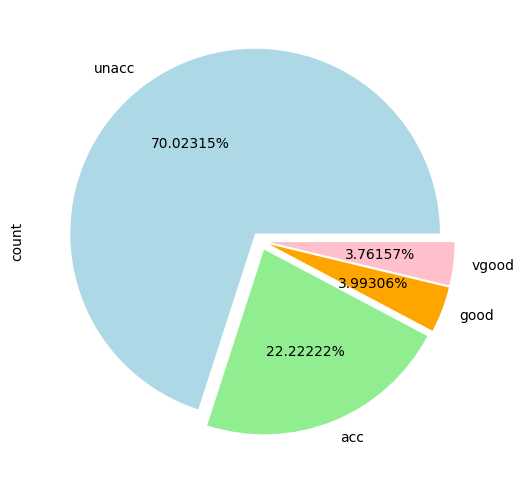

In [4]:
# 예제 데이터셋 분포
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%',
                                   colors=['lightblue','lightgreen','orange','pink'],
                                   explode=(0.05,0.05,0.05,0.05))

- 대부분의 자동차(70%)는 허용 불가능한 상태, 20%만 허용 가능한 수준임. 즉, 양호한 상태의 자동차 비율이 매우 낮음.

In [5]:
### 데이터 전처리
# 데이터를 범주형 타입으로 변환
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']
# 예제 데이터셋 칼럼들의 목록

for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')
    # astype() 메서드 이용하여 데이터를 범주형으로 변환

price = dataset['price'].cat.codes.values   # 1
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)  # 2
categorical_data[:10]  # 합친 넘파이 배열 중 열 개의 행을 출력하여 보여 줌.

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

1. 범주형 데이터를 텐서로 변환하기 위한 절차

    `범주형 데이터 -> dataset[category] -> 넘파이 배열 -> 텐서(Tensor)`

    넘파이 배열을 통해 텐서 생성 가능함. 범주형 데이터(단어)를 숫자(넘파이 배열)로  변환하기 위해 `cat.codes` 사용함. 어떤 숫자로 매핑되어 있는지 확인이 어려운 단점이 있으므로 주의해서 사용하자.
2. np.stack : 두 개 이상의 넘파이 객체 합칠 때 사용.



In [6]:
# 배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [7]:
# 레이블(outputs)로 사용할 칼럼에 대해 텐서로 변환
# get_dummies 이용하여 넘파이 배열로 변환
outputs = pd.get_dummies(dataset.output)  # 1
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()  # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


1. `get_dummies`는 가변수로 만들어 주는 함수

    가변수로 만들어 준다는 의미는 문자를 숫자 (0,1)로 바꾸어 준다는 의미.

In [8]:
# 워드 임베딩 - 유사한 단어끼리 유사하게 인코딩되도록 표현하는 방법.
# 높은 차원의 임베딩일수록 단어 간의 세부적 관계 잘 파악할 수 있음.
# 따라서, 단일 숫자로 변환된 넘파이 배열을 N차원으로 변경하여 사용함.

# 모든 범주형 칼럼에 대한 임베딩 크기(벡터 차원) 정의
# 보통 칼럼의 고유 값 수를 2로 나누는 것 많이 사용.
# 범주형 칼럼을 N차원으로 변환
# (모든 범주형 칼럼의 고유 값 수, 차원의 크기) 형태로 배열 생성

categorical_column_sizes = [len(dataset[column].cat.categories) for column in
                            categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in
                               categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [9]:
# 데이터셋 분리
total_records = 1728
test_records = int(total_records * .2)  # 전체 데이터 중 20%를 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

In [10]:
# 데이터셋 분리 확인
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [11]:
# 모델의 네트워크 생성
class Model(nn.Module):   # 1
    def __init__(self, embedding_size, output_size, layers, p=0.4):   # 2
        super().__init__()   # 3
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni,
                                             nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols  # 입력층의 크기를 찾기 위해 범주형 칼럼 개수를
                                           # input_size 변수에 저장

        for i in layers:   # 4
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers) # 신경망 모든 계층이 순차적으로 실행되도록
                                                 # 모든 계층에 대한 목록(all_layers)을
                                                 # nn.Sequential 클래스로 전달

    def forward(self, x_categorical):  # 5
        embeddings = []
        for i, e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)  # 넘파이 concatenate와 같지만 대상이 텐서가 됨.
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

1. 클래스(class) 형태로 구현되는 모델은 `nn.Module`을 상속받음.

2. `__init__()`은 모델에서 사용될 파라미터와 신경망을 초기화하기 위한 용도로 사용됨. 객체가 생성될 때 자동으로 호출됨. `__init__()`에서 전달되는 매개변수는 다음과 같다.

    ```
    def __init__(self, embedding_size, output_size, layers, p=0.4)

    ```
    a. self : 첫 번째 파라미터는 self를 지정해야 하며 자기 자신을 의미함.
    b. embedding_size : 범주형 칼럼의 임베딩 크기
    c. output_size : 출력층의 크기
    d. p : 드롭아웃(기본값은 0.5)

3. `super().__init__()`은 부모 클래스(Model 클래스)에 접근할 때 사용, `super`는 `self`를 사용하지 않는 것에 주의해야 함.

4. 모델의 네트워크 계층을 구축하기 위해 for문을 이용하여 각 계층을 `all_layers` 목록에 추가함. 추가된 계층은 다음과 같다.
    - Linear : 선형 계층(linear layer)은 입력 데이터에 선형 변환을 진행한 결과.
    - ReLU : 활성화 함수로 사용
    - BatchNorm1d : 배치 정규화(batch normalization) 용도로 사용
    - Dropout : 과적합 방지에 사용

5. `forward()` 함수 : 학습 데이터를 입력 받아 연산을 진행함. 모델 객체를 데이터와 함께 호출하면 자동으로 실행됨.



In [12]:
# Model 클래스의 객체 생성
# 객체 생성하며 (범주형칼럼 임베딩 크기, 출력 크기, 은닉층의 뉴런, 드롭아웃) 전달

model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [13]:
# 모델 파라미터 정의
loss_function = nn.CrossEntropyLoss()   # 분류
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [14]:
# CPU/GPU 사용 지정
if torch.cuda.is_available():
    device = torch.device('cuda')  # GPU가 있다면 GPU 사용
else:
    device = torch.device('cpu')  # GPU 없다면 CPU 사용

In [15]:
# 모델 학습
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)

for i in range(epochs):  # for문을 500회 반복, 각 반복마다 손실 함수가 오차 계산
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)  # 반복할 때마다 오차를 추가

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward() # 가중치 업데이트 위해 손실 함수 backward() 호출
    optimizer.step()  # 옵티마이저 함수 step() 이용하여 기울기 업데이트

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')
# 25 에포크마다 출력된 오차 정보 보여주기

epoch:   1 loss: 1.56874776
epoch:  26 loss: 1.39496768
epoch:  51 loss: 1.30348587
epoch:  76 loss: 1.19227707
epoch: 101 loss: 1.06595588
epoch: 126 loss: 0.94058043
epoch: 151 loss: 0.85637355
epoch: 176 loss: 0.74243939
epoch: 201 loss: 0.69623846
epoch: 226 loss: 0.66772723
epoch: 251 loss: 0.62944156
epoch: 276 loss: 0.61645561
epoch: 301 loss: 0.60517442
epoch: 326 loss: 0.60321236
epoch: 351 loss: 0.59852690
epoch: 376 loss: 0.58948833
epoch: 401 loss: 0.57731938
epoch: 426 loss: 0.57808745
epoch: 451 loss: 0.58691317
epoch: 476 loss: 0.57642478
epoch: 500 loss: 0.5767260790


In [16]:
# 테스트 데이터셋으로 예측 진행
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')
# 테스트 용도의 데이터셋에 대한 손실 값

Loss: 0.56117940


In [17]:
# 모델 예측 확인
# output_size = 4 지정 => 출력층에 4개의 뉴런 포함되도록 지정

print(y_val[:5])

tensor([[ 2.2717,  1.0422, -3.9538, -3.9395],
        [ 2.0265,  0.8523, -3.2435, -3.5775],
        [ 1.6130,  0.7018, -2.9165, -3.1307],
        [ 2.1714,  1.1157, -3.3061, -3.2891],
        [ 1.6166,  0.7992, -2.5314, -2.5702]])


- 실제 출력이 0이면 인덱스 0(2.537)의 값이 인덱스 1(1.3257)의 값보다 높아야 함.


In [18]:
# 가장 큰 값을 갖는 인덱스 확인
# 실제 값이 아닌 인덱스르 찾는 것.
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


- 모두 인덱스 0이 출력되었음.
- 즉, 인덱스가 0인 값이 인덱스가 1인 값보다 크므로 처리된 출력이 0임을 확인할 수 있음.

In [19]:
# 테스트 데이터셋을 이용한 정확도 확인
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[258   1]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       0.50      0.01      0.02        86

    accuracy                           0.75       345
   macro avg       0.63      0.50      0.44       345
weighted avg       0.69      0.75      0.65       345

0.7507246376811594
